![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Deep Learning Methods </center>
## <center> Lecture 6 - Convolutional Neural Network</center>
### <center> 2D CNN - Solution</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/DeepLearningMethods/06_CNN/MainCnn2D_Solution.ipynb)

In [1]:
#-- Wide screen:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
#-- Auto reload:
%load_ext autoreload
%autoreload 2

In [2]:
#-- Imports:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib
import torch

matplotlib.rc('font', **{'size' : 16})

For Colab users:

In [3]:
if 'google.colab' in str(get_ipython()):
    !npx degit FixelAlgorithmsTeam/FixelCourses/DeepLearningMethods/06_CNN/DeepLearningFramework ./DeepLearningFramework

In [4]:
#-- Record figures during training:
from DeepLearningFramework.Training import TrainClassficationModel

### Exercise
* Load the Fashion-MNIST dataset.
* Use 2D CNN, try to get the high accuracy (above 93% is good).

#### Download Fashion-MNIST dataset:

In [5]:
import torchvision
import torchvision.transforms as transforms

oTrainSet = torchvision.datasets.FashionMNIST(root='../../data', train=True,  download=True, transform=transforms.ToTensor())
oTestSet  = torchvision.datasets.FashionMNIST(root='../../data', train=False, download=True, transform=transforms.ToTensor())
oTrainSet.data.shape

torch.Size([60000, 28, 28])

In [6]:
lClasses  = oTrainSet.classes
lClasses

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#### Plot some examples:

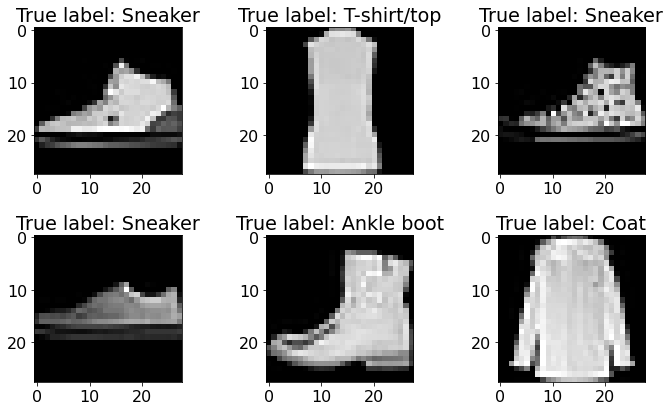

In [7]:
N, H, W = oTrainSet.data.shape
fig, _  = plt.subplots(2, 3, figsize=(10,6))
for ax in fig.axes:
    idx   = np.random.randint(N)
    mX, y = oTrainSet[idx]
    ax.imshow   (mX.squeeze(), cmap='gray')
    ax.set_title(f'True label: {lClasses[y]}')
    
plt.tight_layout()
plt.show()

#### Compute mean and variance:

In [8]:
mean = oTrainSet.data.float().mean() / 255
std  = oTrainSet.data.float().std () / 255
print('µ =', mean)
print('σ =', std)

µ = tensor(0.2860)
σ = tensor(0.3530)


#### Set datasets with normalization:

In [9]:
oTransform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

oTrainSet.transform = oTransform
oTestSet .transform = oTransform

#### Create data loaders:

In [10]:
batchSize = 256
oTrainDL  = torch.utils.data.DataLoader(oTrainSet, shuffle=True,  batch_size=batchSize,   num_workers=2)
oTestDL   = torch.utils.data.DataLoader(oTestSet,  shuffle=False, batch_size=2*batchSize, num_workers=2)

#### Define the model (2D CNN):

In [32]:
import torch.nn            as nn
import torch.nn.functional as F
import torch.optim         as optim
import torchsummary
    
def GetModel():
    oModel = nn.Sequential(
        nn.Identity(), #-- does nothing
        
        nn.Conv2d(1,   16,  3, bias=False),           nn.BatchNorm2d(16),  nn.ReLU(), nn.Dropout2d(0.1),
        nn.Conv2d(16,  32,  3, bias=False),           nn.BatchNorm2d(32),  nn.ReLU(), nn.Dropout2d(0.1),
        nn.Conv2d(32,  64,  3, bias=False, stride=2), nn.BatchNorm2d(64),  nn.ReLU(), nn.Dropout2d(0.1),
        nn.Conv2d(64,  128, 3, bias=False),           nn.BatchNorm2d(128), nn.ReLU(), nn.Dropout2d(0.1),
        nn.Conv2d(128, 256, 3, bias=False, stride=2), nn.BatchNorm2d(256), nn.ReLU(), nn.Dropout2d(0.1),
        
        nn.AdaptiveAvgPool2d(1),
        nn.Flatten(),
        nn.Linear(256, 10),
    )
    
    return oModel

#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
torchsummary.summary(GetModel(), (1, H, W), device='cpu');

Layer (type:depth-idx)                   Output Shape              Param #
├─Identity: 1-1                          [-1, 1, 28, 28]           --
├─Conv2d: 1-2                            [-1, 16, 26, 26]          144
├─BatchNorm2d: 1-3                       [-1, 16, 26, 26]          32
├─ReLU: 1-4                              [-1, 16, 26, 26]          --
├─Dropout2d: 1-5                         [-1, 16, 26, 26]          --
├─Conv2d: 1-6                            [-1, 32, 24, 24]          4,608
├─BatchNorm2d: 1-7                       [-1, 32, 24, 24]          64
├─ReLU: 1-8                              [-1, 32, 24, 24]          --
├─Dropout2d: 1-9                         [-1, 32, 24, 24]          --
├─Conv2d: 1-10                           [-1, 64, 11, 11]          18,432
├─BatchNorm2d: 1-11                      [-1, 64, 11, 11]          128
├─ReLU: 1-12                             [-1, 64, 11, 11]          --
├─Dropout2d: 1-13                        [-1, 64, 11, 11]          --
├─Conv

#### Check whether GPU is available:

In [33]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
DEVICE

device(type='cuda', index=0)

#### Train the model:

In [34]:
oModel  = GetModel().to(DEVICE)
oOptim  = optim.AdamW(oModel.parameters(), lr=4e-3, betas=(0.9, 0.99), weight_decay=1e-2)
Loss    = nn.CrossEntropyLoss()
nEpochs = 30

TrainClassficationModel(oModel, oTrainDL, oTestDL, Loss, nEpochs, oOptim);

Epoch 000: | Train loss: 0.63009 | Val loss: 0.42330 | Train Accuracy: 0.7704 | Val Accuracy: 0.8439 | epoch time: 15.474 | <-- Checkpoint!
Epoch 001: | Train loss: 0.39018 | Val loss: 0.33165 | Train Accuracy: 0.8570 | Val Accuracy: 0.8838 | epoch time: 15.098 | <-- Checkpoint!
Epoch 002: | Train loss: 0.32437 | Val loss: 0.29346 | Train Accuracy: 0.8829 | Val Accuracy: 0.8965 | epoch time: 15.052 | <-- Checkpoint!
Epoch 003: | Train loss: 0.29083 | Val loss: 0.27048 | Train Accuracy: 0.8944 | Val Accuracy: 0.9013 | epoch time: 14.930 | <-- Checkpoint!
Epoch 004: | Train loss: 0.27038 | Val loss: 0.25901 | Train Accuracy: 0.9024 | Val Accuracy: 0.9043 | epoch time: 14.977 | <-- Checkpoint!
Epoch 005: | Train loss: 0.24917 | Val loss: 0.26942 | Train Accuracy: 0.9100 | Val Accuracy: 0.9004 | epoch time: 15.699 |
Epoch 006: | Train loss: 0.23952 | Val loss: 0.24560 | Train Accuracy: 0.9122 | Val Accuracy: 0.9110 | epoch time: 15.520 | <-- Checkpoint!
Epoch 007: | Train loss: 0.22293 | V